##  Problem Definition

**What is the dataset about?**  
This dataset — Amazon Books Dataset — contains information about thousands of books listed on Amazon India, including attributes such as book title, author, main genre, sub-genre, type (paperback, Kindle, hardcover, etc.), price, rating, and number of people who rated each book.

The dataset allows analyzing the distribution of prices, ratings, genres, and authors, and exploring relationships between these variables.

---

**The main questions i will explore**  
- What is the average book price for each type (Paperback, Kindle, Hardcover, etc.)?  
- Do books with higher ratings tend to have higher prices?  
- Which main genres are more expensive on average?  
- Who are the most prolific authors (by number of books)?  
- What correlations exist between numeric features (price, rating, reviews)?  

---

**What insights do I expect to uncover?**  
I expect to discover:  
- Whether higher-rated books command higher prices.   
- Outlier books — extremely expensive — that may represent special/academic books or data noise.   
- Correlations and relationships that can guide future modeling (e.g., price prediction).  


In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
books= pd.read_csv('books.csv')
genre= pd.read_csv('Genre_df.csv')
subgenre= pd.read_csv('Sub_Genre_df.csv')

# Data Exploration Overview

In [173]:
books.head()

,Unnamed: 0,Title,Author,Main Genre,Sub Genre,Type,Price,Rating,No. of People rated,URLs
0,0,The Complete Novel of Sherlock Holmes,Arthur Conan Doyle,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹169.00,4.4,19923.0,https://www.amazon.in/Complete-Novels-Sherlock-Holmes/dp/8175994312/ref=zg_bs_g_1318054031_d_sccl_1/000-0000000-0000000?psc=1
1,1,"Black Holes (L) : The Reith Lectures [Paperback] Hawking, Stephen",Stephen Hawking,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹99.00,4.5,7686.0,https://www.amazon.in/Black-Holes-Lectures-Stephen-Hawking/dp/085750357X/ref=zg_bs_g_1318054031_d_sccl_2/000-0000000-0000000?psc=1
2,2,The Kite Runner,Khaled Hosseini,"Arts, Film & Photography",Cinema & Broadcast,Kindle Edition,₹175.75,4.6,50016.0,https://www.amazon.in/Kite-Runner-Khaled-Hosseini-ebook/dp/B00B0CR0O6/ref=zg_bs_g_1318054031_d_sccl_3/000-0000000-0000000?psc=1
3,3,Greenlights: Raucous stories and outlaw wisdom from the Academy Award-winning actor,Matthew McConaughey,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹389.00,4.6,32040.0,https://www.amazon.in/Greenlights-Raucous-stories-Academy-Award-winning/dp/1472280873/ref=zg_bs_g_1318054031_d_sccl_4/000-0000000-0000000?psc=1
4,4,"The Science of Storytelling: Why Stories Make Us Human, and How to Tell Them Better",Will Storr,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹348.16,4.5,1707.0,https://www.amazon.in/Science-Storytelling-Will-Storr/dp/0008276978/ref=zg_bs_g_1318054031_d_sccl_5/000-0000000-0000000?psc=1


In [174]:
genre.head()

,Title,Number of Sub-genres,URL
0,Action & Adventure,0,https://www.amazon.in/gp/bestsellers/books/1318158031
1,"Arts, Film & Photography",11,https://www.amazon.in/gp/bestsellers/books/1318052031
2,"Biographies, Diaries & True Accounts",3,https://www.amazon.in/gp/bestsellers/books/1318064031
3,Business & Economics,4,https://www.amazon.in/gp/bestsellers/books/1318068031
4,Children's Books,34,https://www.amazon.in/gp/bestsellers/books/64619755031


In [175]:
subgenre.head()

,Title,Main Genre,No. of Books,URLs
0,Architecture,"Arts, Film & Photography",100.0,https://www.amazon.in/gp/bestsellers/books/1318053031
1,Cinema & Broadcast,"Arts, Film & Photography",100.0,https://www.amazon.in/gp/bestsellers/books/1318054031
2,Dance,"Arts, Film & Photography",100.0,https://www.amazon.in/gp/bestsellers/books/1318055031
3,Design & Fashion,"Arts, Film & Photography",100.0,https://www.amazon.in/gp/bestsellers/books/1318056031
4,Museums & Museology,"Arts, Film & Photography",100.0,https://www.amazon.in/gp/bestsellers/books/1318058031


In [176]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7706 entries, 0 to 7705
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7706 non-null   int64  
 1   Title                7706 non-null   object 
 2   Author               7685 non-null   object 
 3   Main Genre           7706 non-null   object 
 4   Sub Genre            7706 non-null   object 
 5   Type                 7706 non-null   object 
 6   Price                7706 non-null   object 
 7   Rating               7706 non-null   float64
 8   No. of People rated  7706 non-null   float64
 9   URLs                 7706 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 602.2+ KB


In [177]:
books.describe()

,Unnamed: 0,Rating,No. of People rated
count,7706.000000,7706.000000,7706.000000
mean,3873.852453,4.310382,6665.862834
std,2258.491767,0.804096,22370.992913
min,0.000000,0.000000,0.000000
25%,1926.250000,4.300000,77.000000
50%,3852.500000,4.500000,557.000000
75%,5778.750000,4.600000,3045.500000
max,7927.000000,5.000000,500119.000000


## Exploring the Title Column

In [178]:
books['Title']

,Title
0,The Complete Novel of Sherlock Holmes
1,"Black Holes (L) : The Reith Lectures [Paperback] Hawking, Stephen"
2,The Kite Runner
3,Greenlights: Raucous stories and outlaw wisdom from the Academy Award-winning actor
4,"The Science of Storytelling: Why Stories Make Us Human, and How to Tell Them Better"
...,...
7701,Insight Guides Poland (Travel Guide with Free eBook) (Insight Guides Main Series)
7702,Lonely Planet India 19 (Travel Guide)
7703,Eyewitness Travel Phrase Book French (EW Travel Guide Phrase Books)
7704,Lonely Planet Australia (Travel Guide)


In [179]:
# Basic Title statistics
print("=== Basic Title Stats ===")
print("Missing titles:", books['Title'].isnull().sum())
print("Duplicate titles:", books['Title'].duplicated().sum())
print("Unique titles:", books['Title'].nunique())


=== Basic Title Stats ===
Missing titles: 0
Duplicate titles: 2000
Unique titles: 5706


The Title column has no missing values, but it contains a large number of duplicates.  
This indicates that many books appear multiple times in the dataset, possibly because Amazon lists the same product under several categories or formats.

In [180]:
# Duplicates by (Title, Type) combination
print("=== Duplicates by (Title, Type) ===")
title_type_counts = (
    books.groupby(['Title', 'Type'])
         .size()
         .reset_index(name='Count')
         .sort_values('Count', ascending=False)
)
title_type_counts.head()

=== Duplicates by (Title, Type) ===


,Title,Type,Count
2361,Karatedo Magazine JKFan Dec. 2023: Japan Karatedo Fan,Kindle Edition,8
4759,The Kid Who Came From Space,Paperback,8
2413,Knowledge Encyclopedia Space,Hardcover,7
973,"Children's First Mythology Stories - Pack of 5 books (Ram, Shiva, Hanuman, Ganesha, Vishnu) (Classic Tales from India)",Paperback,7
2407,Knowledge Encyclopedia - Inventions and Discoveries (Knowledge Encyclopedia for Children),Hardcover,7


Grouping by both Title and Type shows that several books appear many times even within the same format (e.g., multiple Kindle entries).  
This confirms that duplicates are caused by Amazon allowing multiple sellers or category listings for the same book rather than representing truly unique items.


In [181]:
mask = books['Title'].str.contains(
    'paperback|hardcover|hardback|pb|pbk|hc',
    case=False)
books[mask]['Title'].head(20)


,Title
1,"Black Holes (L) : The Reith Lectures [Paperback] Hawking, Stephen"
12,A PRINCESS REMEMBERS (PB)
23,"FANTASTIC BEASTS: THE SECRETS OF DUMBLEDORE � THE COMPLETE SCREENPLAY [Hardcover] Rowling, J.K. and Kloves, Steve"
24,Conversations with Mani Ratnam (PB)
25,Hitchcock
35,Sara Aakash [Paperback] Rajendra Yadav
72,Sangeeta Bala Padam - Varnam Part - 2 (Hardcover)
116,"Hayvadan [Hardcover] Girish Karnad, Tr. B.V. Karant"
128,Film Lighting: Talks with Hollywood's Cinematographers and Gaffers [Paperback] Kris Malkiewicz
200,"Tuesdays With Morrie: An old man, a young man, and life's greatest lesson [Paperback] Albom, Mitch"


Many titles include format labels such as Paperback, Hardcover, PB, and HC.  
These labels are unnecessary because the dataset already contains a separate "Type" column, so they should be removed during cleaning to avoid noise.

## Exploring the Author Column

In [182]:
# Basic Author statistics
print("=== Basic Author Stats ===")
print("Missing values:", books['Author'].isnull().sum())
print("Unique authors:", books['Author'].nunique())
print("Duplicate authors:", books['Author'].duplicated().sum())

=== Basic Author Stats ===
Missing values: 21
Unique authors: 3660
Duplicate authors: 4045


The Author column contains a small number of missing values, which is normal for online book listings.  
There is a high amount of author duplication, mainly because many books are written by the same authors and because duplicated book entries naturally repeat the same author name.  


## Exploring the Genre Column

In [183]:
# Basic Genre statistics
print("=== Basic Main Genre Stats ===")
print("Missing values:", books['Main Genre'].isnull().sum())
print("Unique genres:", books['Main Genre'].nunique())

=== Basic Main Genre Stats ===
Missing values: 0
Unique genres: 30


In [184]:
valid_genres = genre['Title'].unique()
books[~books['Main Genre'].isin(valid_genres)]['Main Genre'].unique()

array([], dtype=object)

The Main Genre column has 30 unique values with no missing entries.  
All values match the genre reference dataset

## Exploring the Sub Genre Column

In [185]:
# Basic Sub Genre statistics
print("=== Basic Sub Genre Stats ===")
print("Missing values:", books['Sub Genre'].isnull().sum())
print("Unique sub genres:", books['Sub Genre'].nunique())

=== Basic Sub Genre Stats ===
Missing values: 0
Unique sub genres: 151


In [186]:
# Create a dictionary: SubGenre → list of possible MainGenres
valid_map = subgenre.groupby('Title')['Main Genre'].apply(set).to_dict()

def is_valid(row):
    sub = row['Sub Genre']
    main = row['Main Genre']

    if sub in valid_map:
        return main in valid_map[sub]
    else:
        return False  # Sub Genre not found in reference at all

merged['is_valid'] = merged.apply(is_valid, axis=1)
invalid = merged[~merged['is_valid']]
invalid[['Title', 'Sub Genre', 'Main Genre']].head()


,Title,Sub Genre,Main Genre


The Sub Genre column has 151 unique values with no missing entries.  
All Sub Genres in the dataset match at least one valid Main Genre from the subgenre reference dataset.  


## Exploring the Type Column

In [187]:
print("=== Basic Type Stats ===")
print("Missing values:", books['Type'].isnull().sum())
print("Unique types:", books['Type'].nunique())
print()

=== Basic Type Stats ===
Missing values: 0
Unique types: 33



In [188]:
books['Type'].value_counts()

,count
Type,
Paperback,4200
Kindle Edition,2125
Hardcover,787
Audible Audiobook,199
Board book,181
Perfect Paperback,45
Product Bundle,44
Unknown Binding,24
Mass Market Paperback,17


The Type column has no missing values but contains 33 inconsistent formats.
These variations refer to similar book types, so the column will need standardization during cleaning.

## Exploring the Price Column

In [189]:
import re
# remove non-numeric characters (except dot) and convert to float
books['Price'] = books['Price'].astype(str).apply(
    lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.sub(r'[^0-9.]', '', x) != '' else 0)

In [190]:
books['Price'].describe()

,Price
count,7706.000000
mean,498.605901
std,958.436212
min,0.010000
25%,197.000000
50%,321.000000
75%,469.990000
max,35829.000000


In [191]:
print("=== Basic Price Stats ===")
print("Missing values:", books['Price'].isnull().sum())

=== Basic Price Stats ===
Missing values: 0


In [192]:
print("=== Smallest 10 prices ===")
books.sort_values('Price')[['Title','Type', 'Price']].head(10)

=== Smallest 10 prices ===


,Title,Type,Price
393,Think & Grow Rich | Napoleon Hill | Hardcover | International Bestseller Book,Hardcover,0.01
4623,Hanuman Chalisa Pocket Size Book In Hindi [Pack Of 1] - Hanuman Chalisa Book In Hindi Geeta Press - Hanuman Chalisa By Geeta Press,Paperback,1.00
4225,Two Reflections of My Heart,Kindle Edition,1.18
3068,How to Win Friends and Influence People,Kindle Edition,9.00
3114,How to Win Friends and Influence People,Kindle Edition,9.00
3060,Money Making Skills by Warren Buffet: Money Making Skills by Warren Buffet: A Guide to Building Wealth (Warren Buffett Investment Strategy Book),Kindle Edition,11.80
2689,Crime and Punishment,Kindle Edition,16.50
4594,Siddhartha (Deluxe Hardbound Edition),Kindle Edition,16.52
4648,Vidur Neeti (Code 136),Paperback,19.00
2885,POLYTECHNIC? UTTAR PRADESH:? ?MODEL SOL,Paperback,21.78


In [193]:
print("=== Largest 10 prices ===")
books.sort_values('Price', ascending=False)[['Title','Type',  'Price']].head(10)

=== Largest 10 prices ===


,Title,Type,Price
2145,Distributed Computing and Artificial Intelligence: 9th International Conference: 151 (Advances in Intelligent and Soft Computing),Paperback,35829.00
4198,BRENNER & RECTOR'S THE KIDNEY 02 VOL SET,Hardcover,29280.00
4178,"Webb, Müller and Naidich's High-Resolution CT of the Lung",Hardcover,26499.96
4148,Autism Spectrum Disorder: Bioregenerative Medicine With Stem Cell Therapy,Paperback,14885.00
2944,PMP Exam Prep Simplified: Covers the Current PMP Exam and Includes a 35 Hours of Project Management E-Learning Course,Paperback,13887.00
6422,"The Feynman Lectures on Physics, boxed set",Hardcover,13875.00
6973,The Big Shots: Edwardian Shooting Parties,Hardcover,13018.76
4145,Clinical Trials - A Methodologic Perspective 3e (Wiley Series in Probability and Statistics),Hardcover,12624.00
6169,"The Global Governance of Climate Change: G7, G20, and UN Leadership (Global Environmental Governance)",Hardcover,12180.00
4031,Point-of-Care Ultrasound for the Neonatal and Pediatric Intensivist: A Practical Guide on the Use of POCUS,Hardcover,11569.00


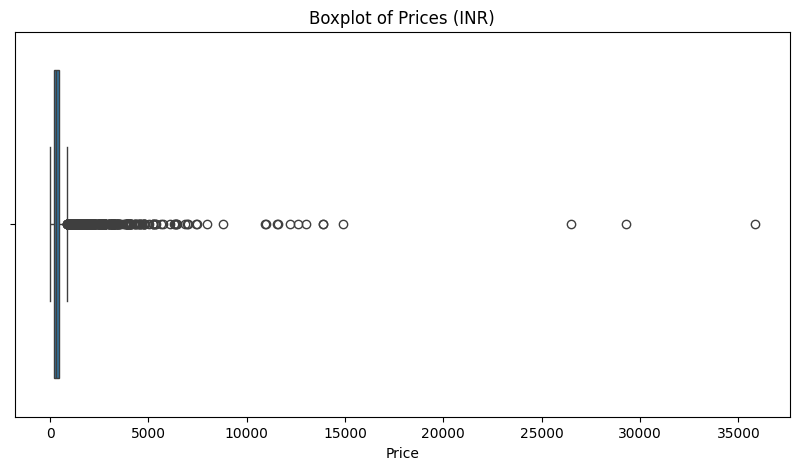

In [194]:
plt.figure(figsize=(10,5))
sns.boxplot(x=books['Price'])
plt.title("Boxplot of Prices (INR)")
plt.show()

No missing values in the price column.

Prices vary widely from 0.01 → 35,829 INR.

Contains both unusually low and unusually high values.

## Exploring the Rating Column

In [195]:
books['Rating'].describe()

,Rating
count,7706.000000
mean,4.310382
std,0.804096
min,0.000000
25%,4.300000
50%,4.500000
75%,4.600000
max,5.000000


In [196]:
print("=== Basic Rating Stats ===")
print("Missing values:", books['Rating'].isnull().sum())
print("Unique ratings:", books['Rating'].nunique())

=== Basic Rating Stats ===
Missing values: 0
Unique ratings: 32


In [197]:
print("Books with Rating = 0:", (books['Rating'] == 0).sum())

Books with Rating = 0: 224


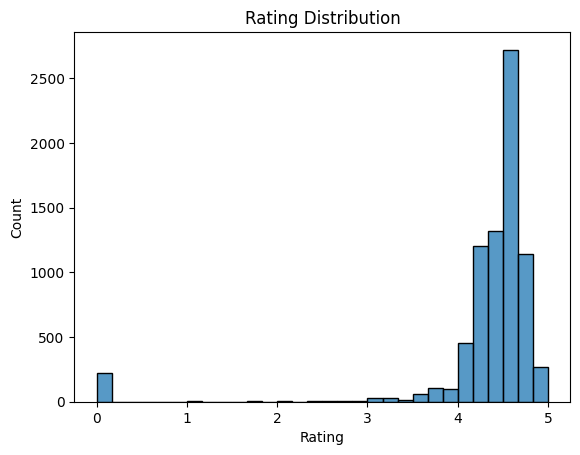

In [198]:
sns.histplot(books['Rating'], bins=30)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution")
plt.show()


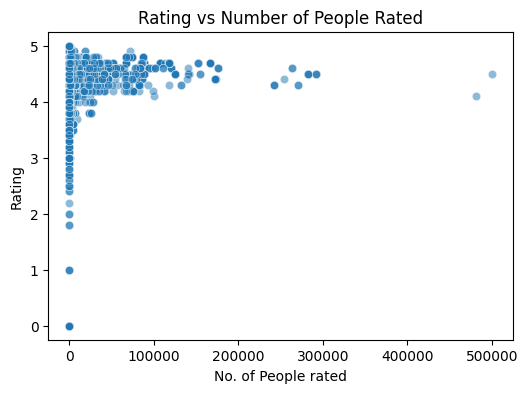

In [199]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=books, x='No. of People rated', y='Rating', alpha=0.5)
plt.title("Rating vs Number of People Rated")
plt.show()


The Rating column has no missing values and contains 32 unique rating values.
A total of 224 books have a rating of 0.0, indicating they are unrated rather than poorly rated.
The rating distribution is heavily skewed, with the majority of books rated between 4.0 and 5.0, while very few fall below 3.

Exploring the No. of People rated	 Column

In [200]:
books['No. of People rated'].describe()

,No. of People rated
count,7706.000000
mean,6665.862834
std,22370.992913
min,0.000000
25%,77.000000
50%,557.000000
75%,3045.500000
max,500119.000000


In [201]:
print("=== Basic People Rated Stats ===")
print("Missing values:", books['No. of People rated'].isnull().sum())
print("Books with 0 People Rated:", (books['No. of People rated'] == 0).sum())


=== Basic People Rated Stats ===
Missing values: 0
Books with 0 People Rated: 224


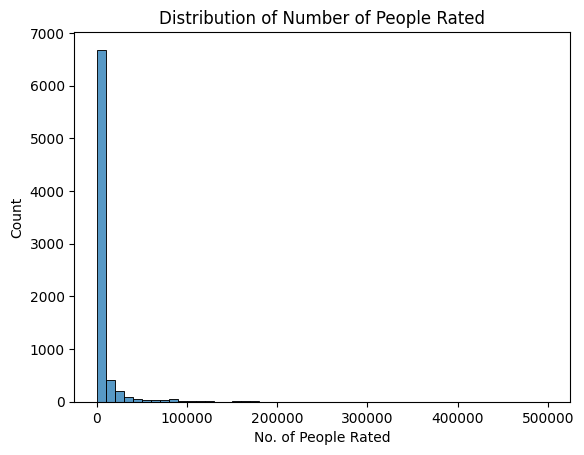

In [202]:
sns.histplot(books['No. of People rated'], bins=50)
plt.xlabel("No. of People Rated")
plt.ylabel("Count")
plt.title("Distribution of Number of People Rated")
plt.show()


The column has no missing values.
A total of 224 books have 0 reviewers.
The distribution is extremely skewed, with most books having few ratings and only a small number receiving very high counts.

## Data cleaning

In [203]:
books.shape

(7706, 10)

In [204]:
# Remove columns that are not useful for analysis or modeling
columns_to_drop = ['Unnamed: 0','URLs']
books = books.drop(columns=columns_to_drop)

In [205]:
# Remove format words from title (paperback, hardcover, pb, hc...)
format_words = r"(paperback|hardcover|hardback|pb|pbk|hc)"
books['Title'] = books['Title'].str.replace(format_words, "", case=False, regex=True)

In [206]:
# Replace missing authors with "Unknown"
books['Author'] = books['Author'].fillna("Unknown")

In [207]:
# Mapping rare or similar types into unified categories
type_map = {
    # Merge all paperback variations
    "Paperback Bunko": "Paperback",
    "Mass Market Paperback": "Paperback",
    "Perfect Paperback": "Paperback",
    "Flexibound": "Paperback",
    "Spiral-bound": "Paperback",
    "Staple Bound": "Paperback",

    # Merge all hardcover variations
    "Print on Demand (Hardcover)": "Hardcover",
    "Library Binding": "Hardcover",
    "Textbook Binding": "Hardcover",

    # Group very rare types into "Other"
    "Sheet music": "Other",
    "Poster": "Other",
    "Cards": "Other",
    "Diary": "Other",
    "Workbook": "Other",
    "Stationery": "Other",
    "Calendar": "Other",
    "Game": "Other",
    "Puzzle": "Other",
    "Map": "Other",
    "Wall Chart": "Other",
    "Misc. Supplies": "Other",
    "Card Book": "Other",
    "Gift": "Other",
    "Rag Book": "Other",
    "Single Issue Magazine": "Other",
    "Product Bundle": "Other",
    "Unknown Binding": "Other",
    "Kindle Edition with Audio/Video": "Other"
}

# Apply mapping
books['Type'] = books['Type'].replace(type_map)

In [208]:
books['Type'].value_counts()

,count
Type,
Paperback,4288
Kindle Edition,2125
Hardcover,792
Audible Audiobook,199
Board book,181
Other,121


In [209]:
# 1) Remove unrealistic low prices
books = books[books['Price'] >= 5]

# 2) Detect price outliers using IQR (we don't remove them — just mark them)
Q1 = books['Price'].quantile(0.25)
Q3 = books['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

books['Price_outlier'] = (books['Price'] < lower_bound) | (books['Price'] > upper_bound)

# 3) Log transform (for modeling & better distribution)
books['Price_log'] = np.log1p(books['Price'])

In [210]:
# Remove unrated books (Rating=0 AND PeopleRated=0)
books = books[(books['Rating'] > 0) & (books['No. of People rated'] > 0)]

# People rated should be integer
books['No. of People rated'] = books['No. of People rated'].astype(int)

In [211]:
books.shape

(7479, 10)

In [212]:
missing_values = books.isnull().sum()
print(f"Number of missing values: \n{missing_values}")


Number of missing values: 
Title                  0
Author                 0
Main Genre             0
Sub Genre              0
Type                   0
Price                  0
Rating                 0
No. of People rated    0
Price_outlier          0
Price_log              0
dtype: int64


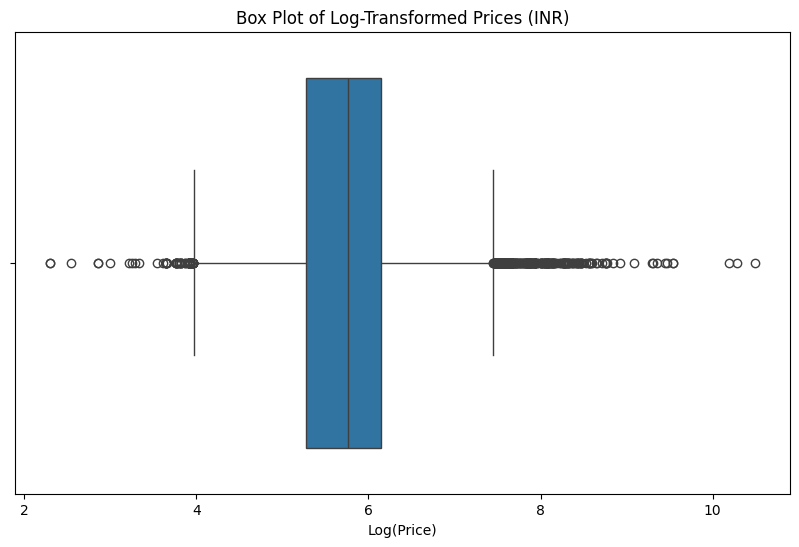

In [215]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=books['Price_log'])
plt.title('Box Plot of Log-Transformed Prices (INR)')
plt.xlabel('Log(Price)')
plt.show()

In [16]:
genre.shape

(35, 3)

#ِEDA

### Q1: Do books with more reviews tend to have higher prices?

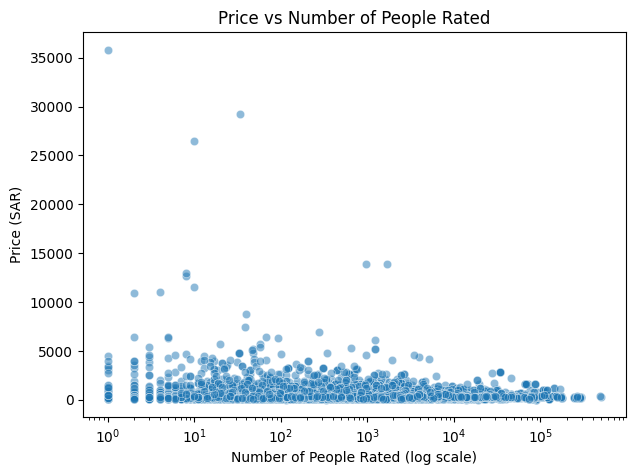

Correlation between number of people rated and price (INR): -0.03629957163981051


In [216]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=books,
    x='No. of People rated',
    y='Price',
    alpha=0.5
)
plt.xscale('log')  # لأن الأعداد كبيرة وموزونة
plt.xlabel('Number of People Rated (log scale)')
plt.ylabel('Price (SAR)')
plt.title('Price vs Number of People Rated')
plt.show()

# Optional: correlation
corr_reviews_price = books['No. of People rated'].corr(books['Price'])
print("Correlation between number of people rated and price (INR):", corr_reviews_price)


### Q2: What is the average book price for each Type?

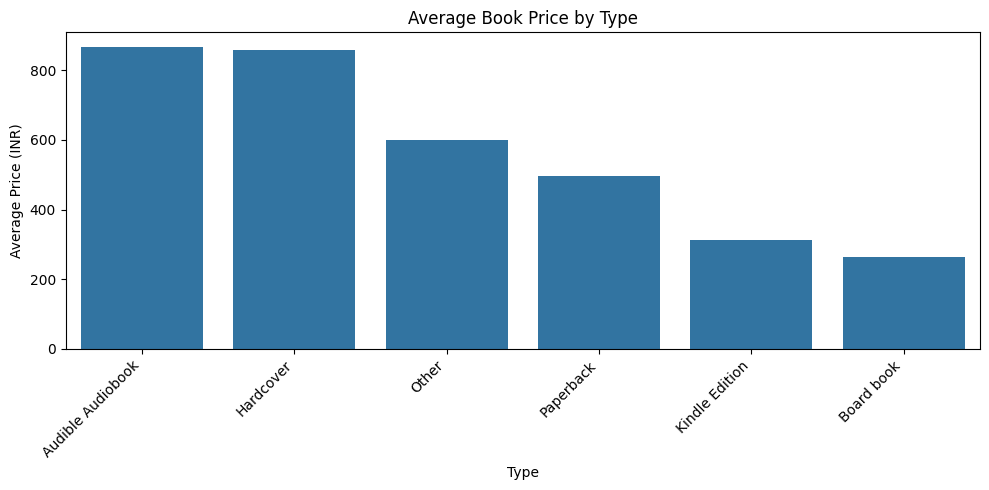

,Type,Price
0,Audible Audiobook,865.426396
2,Hardcover,858.123162
4,Other,599.407241
5,Paperback,496.570641
3,Kindle Edition,311.243403


In [218]:
avg_price_by_type = (
    books
    .groupby('Type', as_index=False)['Price']
    .mean()
    .sort_values('Price', ascending=False)
)

plt.figure(figsize=(10, 5))
sns.barplot(data=avg_price_by_type, x='Type', y='Price')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Price (INR)')
plt.title('Average Book Price by Type')
plt.tight_layout()
plt.show()

avg_price_by_type.head()


### Q3: Do higher-rated books tend to be more expensive?

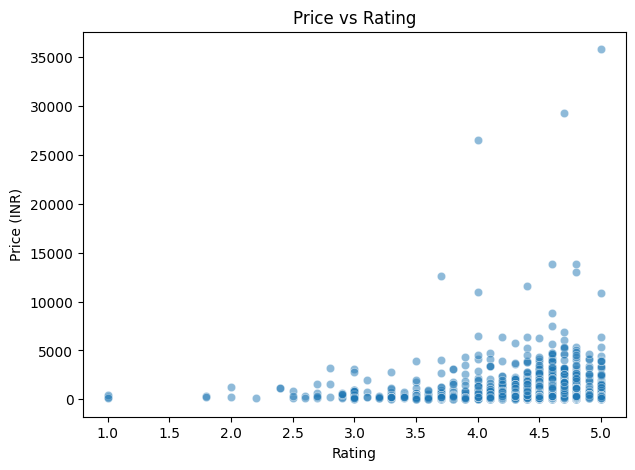

Correlation between rating and price (INR): 0.06856160024007102


In [219]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=books, x='Rating', y='Price', alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Price (INR)')
plt.title('Price vs Rating')
plt.show()

corr_price_rating = books['Rating'].corr(books['Price'])
print("Correlation between rating and price (INR):", corr_price_rating)


### Q4: Who are the top 10 most published authors in the dataset?

Author
Wonder House Books         388
Maple Press                110
Jeff Kinney                 86
J.K. Rowling                84
Dreamland Publications      78
Team Pegasus                54
Sudha Murty                 51
Rick Riordan                46
Oswaal Editorial Board      46
Om Books Editorial Team     44
Name: count, dtype: int64


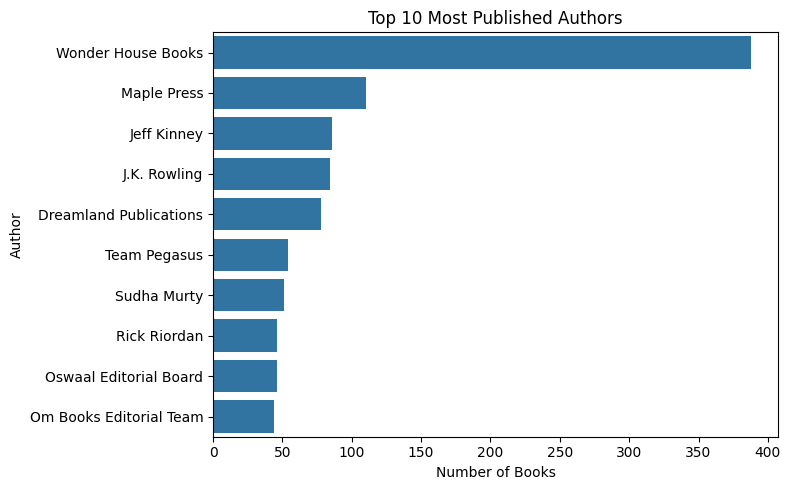

In [220]:
top_authors = (
    books['Author']
    .value_counts()
    .head(10)
)

print(top_authors)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_authors.values, y=top_authors.index, orient='h')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.title('Top 10 Most Published Authors')
plt.tight_layout()
plt.show()


###Q6: Correlation Heatmap – What variables have the strongest correlation with Price?

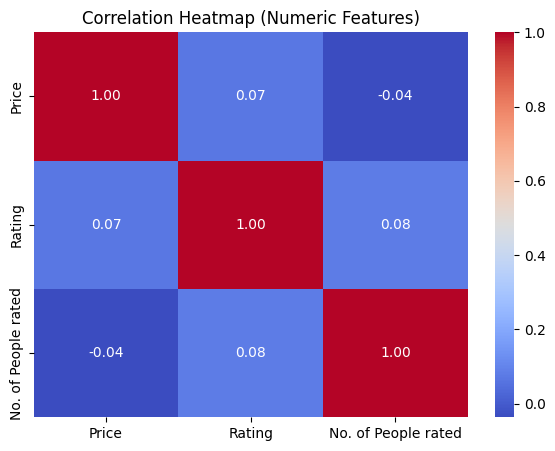

In [224]:
numeric_cols = ['Price','Rating', 'No. of People rated']
corr = books[numeric_cols].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()


### Q7: Which book has the highest price

In [226]:
most_expensive_book = books.sort_values('Price', ascending=False).iloc[0]
print(most_expensive_book[['Title', 'Author', 'Type', 'Main Genre', 'Price']])

Title         Distributed Computing and Artificial Intelligence: 9th International Conference: 151 (Advances in Intelligent and Soft Computing)
Author                                                                                                                             Sigeru Omatu
Type                                                                                                                                  Paperback
Main Genre                                                                                                  Computing, Internet & Digital Media
Price                                                                                                                                   35829.0
Name: 2145, dtype: object


### Q8: What does the distribution of book ratings look like?

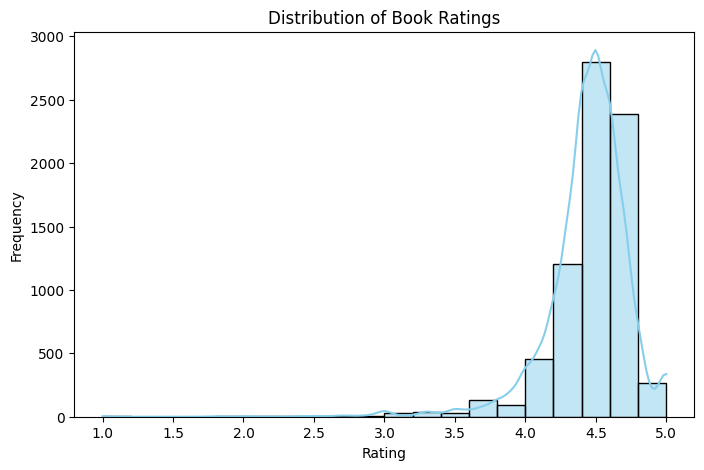

In [228]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=books,
    x='Rating',
    bins=20,
    kde=True,
    color='skyblue'
)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Book Ratings')
plt.show()


In [234]:
books.to_csv('cleaned_books.csv', index=False)
print("Cleaned data saved to 'cleaned_books.csv'")

Cleaned data saved to 'cleaned_books.csv'
